<a href="https://colab.research.google.com/github/habstrakT808/Learning-Vector-Quantiziation---Data-Classification/blob/main/LVQ_HAFIYAN_AL_MUQAFFI_UMARY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Vector Quantization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

## Kode

LVQ

In [2]:
#Tidak perlu diubah
def lvq_fit(train, target, lrate, b, max_epoch):
  label, train_idx = np.unique(target, return_index=True)
  weight = train[train_idx].astype(np.float64)
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
  train, target = train[:, 0], train[:, 1]
  epoch = 0

  while epoch < max_epoch:
    for i, x in enumerate(train):
      distance = [sum((w - x) ** 2) for w in weight]
      min = np.argmin(distance)
      sign = 1 if target[i] == label[min] else -1
      weight[min] += sign * lrate * (x - weight[min])
    lrate *= b
    epoch += 1

  return weight, label

LVQ2

In [3]:
def lvq2_fit(train, target, lrate, b, max_epoch, epsilon):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)
    train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
    train, target = train[:, 0], train[:, 1]
    epoch = 0

    while epoch < max_epoch:
        for i, x in enumerate(train):
            distance = [sum((w - x) ** 2) for w in weight]
            distance = np.array(distance)
            min_indices = np.argpartition(distance, 1)[:2]
            min_values = distance[min_indices]
            sorted_min_indices = min_indices[np.argsort(min_values)]
            c = sorted_min_indices[0]  # Terdekat
            r = sorted_min_indices[1]  # Kedua Terdekat

            # Pengecekan rasio jarak terdekat dengan jarak kedua terdekat terhadap epsilon
            if distance[c] / distance[r] <= 1 + epsilon:
                # Pengecekan bahwa label terdekat tidak sama dengan target
                if label[c] != target[i]:
                    # Pengecekan bahwa label kedua terdekat bernilai sama dengan target
                    if label[r] == target[i]:
                        # Update bobot untuk kelas terdekat (c) dan kedua terdekat (r)
                        weight[c] -= lrate * (x - weight[c])  # Menjauh
                        weight[r] += lrate * (x - weight[r])  # Mendekati

        lrate *= b
        epoch += 1

    return weight, label


LVQ2.1

In [4]:
def lvq21_fit(train, target, lrate, b, max_epoch, epsilon):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)
    train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
    train, target = train[:, 0], train[:, 1]
    epoch = 0

    while epoch < max_epoch:
        for i, x in enumerate(train):
            distance = [sum((w - x) ** 2) for w in weight]
            distance = np.array(distance)
            min_indices = np.argpartition(distance, 1)[:2]
            min_values = distance[min_indices]
            sorted_min_indices = min_indices[np.argsort(min_values)]
            c1 = sorted_min_indices[0]  # Terdekat
            c2 = sorted_min_indices[1]  # Kedua Terdekat

            # Pengecekan rasio jarak terdekat dengan jarak kedua terdekat terhadap epsilon
            if distance[c1] / distance[c2] <= 1 + epsilon:
                # Pengecekan bahwa label terdekat sama dengan target
                if label[c1] == target[i]:
                    # Update bobot untuk kelas terdekat (c1)
                    weight[c1] += lrate * (x - weight[c1])  # Mendekati
                    weight[c2] -= lrate * (x - weight[c2])  # Menjauh
                # Pengecekan bahwa label kedua terdekat sama dengan target
                elif label[c2] == target[i]:
                    # Update bobot untuk kelas kedua terdekat (c2)
                    weight[c1] -= lrate * (x - weight[c1])  # Menjauh
                    weight[c2] += lrate * (x - weight[c2])  # Mendekati

        lrate *= b
        epoch += 1

    return weight, label


Fungsi Testing dan Hitung Akurasi


In [5]:
#Tidak perlu diubah
def lvq_predict(X, model):
  center, label = model
  Y = []
  for x in X:
    d = [sum((c - x) ** 2) for c in center]
    Y.append(label[np.argmin(d)])
  return Y

def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

## Percobaan

Lakukan training LVQ dengan
- learning rate 0.5
- perubahan learning rate 0.8
- epoch maksimum 100
- epsilon 0.3

In [6]:
def lvq_fit(train, target, lrate, b, max_epoch):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)

    # Filter data dan target berdasarkan indeks prototipe
    train_filtered = [x for i, x in enumerate(train) if i not in train_idx]
    target_filtered = [y for i, y in enumerate(target) if i not in train_idx]

    train = np.array(train_filtered)
    target = np.array(target_filtered)

    epoch = 0
    while epoch < max_epoch:
        for i, x in enumerate(train):
            distance = [sum((w - x) ** 2) for w in weight]
            min_idx = np.argmin(distance)
            sign = 1 if target[i] == label[min_idx] else -1
            weight[min_idx] += sign * lrate * (x - weight[min_idx])
        lrate *= b
        epoch += 1

    return weight, label


Accuracy: 0.9


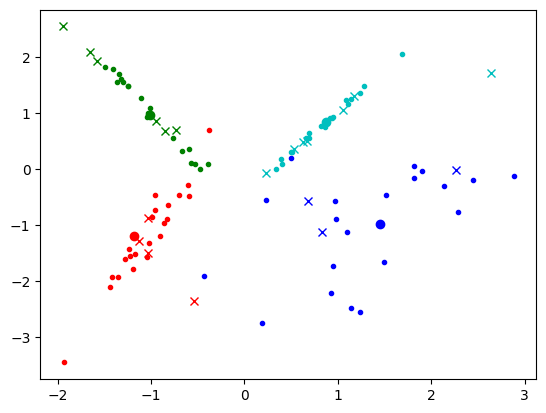

In [7]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_classes=4, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = lvq_fit(X_train, y_train, lrate=0.5, b=0.8, max_epoch=100)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(y_test, output)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

In [8]:
def lvq2_fit(train, target, lrate, b, max_epoch, epsilon):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)

    # Pisahkan data dan target setelah filter
    train_filtered = [x for i, x in enumerate(train) if i not in train_idx]
    target_filtered = [y for i, y in enumerate(target) if i not in train_idx]

    train = np.array(train_filtered)
    target = np.array(target_filtered)

    epoch = 0
    while epoch < max_epoch:
        for i, x in enumerate(train):
            distance = [sum((w - x) ** 2) for w in weight]
            distance = np.array(distance)
            min_indices = np.argpartition(distance, 1)[:2]
            min_values = distance[min_indices]
            sorted_min_indices = min_indices[np.argsort(min_values)]
            c = sorted_min_indices[0]  # Terdekat
            r = sorted_min_indices[1]  # Kedua Terdekat

            # Pengecekan rasio jarak terdekat dan kedua terdekat
            if min_values[0] / min_values[1] < epsilon:
                # Jika label terdekat tidak sama dengan target
                if label[c] != target[i]:
                    # Jika label kedua terdekat sama dengan target
                    if label[r] == target[i]:
                        # Update bobot untuk kelas terdekat dan kedua terdekat
                        weight[c] -= lrate * (x - weight[c])
                        weight[r] += lrate * (x - weight[r])

        lrate *= b
        epoch += 1

    return weight, label

Accuracy: 0.85


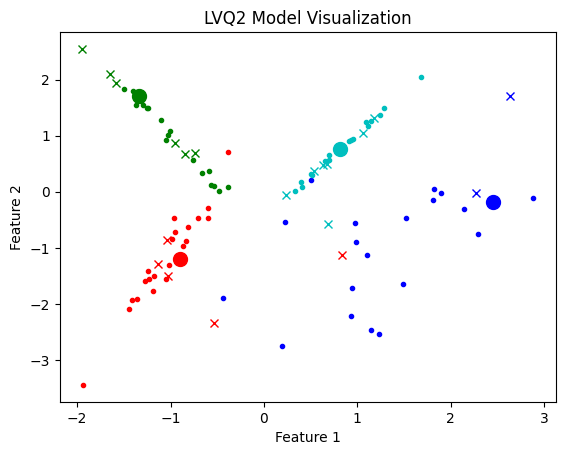

In [9]:
model = lvq2_fit(X_train, y_train, lrate=0.5, b=0.8, max_epoch=100, epsilon=0.3)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(y_test, output)

colors = 'rgbcmyk'
print('Accuracy:', accuracy)

for x, label in zip(X_train, y_train):
    plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
    plt.plot(center[0], center[1], colors[label] + 'o', markersize=10)
for x, label in zip(X_test, output):
    plt.plot(x[0], x[1], colors[label] + 'x')

plt.title('LVQ2 Model Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
def lvq21_fit(train, target, lrate, b, max_epoch, epsilon):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)

    # Buat data train dan target dengan filter
    train_filtered = [e for i, e in enumerate(zip(train, target)) if i not in train_idx]
    train, target = np.array([x[0] for x in train_filtered]), np.array([x[1] for x in train_filtered])

    epoch = 0
    while epoch < max_epoch:
        for i, x in enumerate(train):
            distance = [np.sum((w - x) ** 2) for w in weight]
            distance = np.array(distance)

            # Ambil dua jarak terdekat
            min_indices = np.argpartition(distance, 1)[:2]
            min_values = distance[min_indices]
            sorted_min_indices = min_indices[np.argsort(min_values)]
            c1 = sorted_min_indices[0]  # Terdekat
            c2 = sorted_min_indices[1]  # Kedua Terdekat

            # Rasio jarak terhadap epsilon
            if min_values[0] / min_values[1] < 1 + epsilon:
                if label[c1] == target[i]:
                    weight[c1] += lrate * (x - weight[c1])
                elif label[c2] == target[i]:
                    weight[c2] += lrate * (x - weight[c2])
                    weight[c1] -= lrate * (x - weight[c1])

        lrate *= b
        epoch += 1

    return weight, label

Accuracy: 0.9


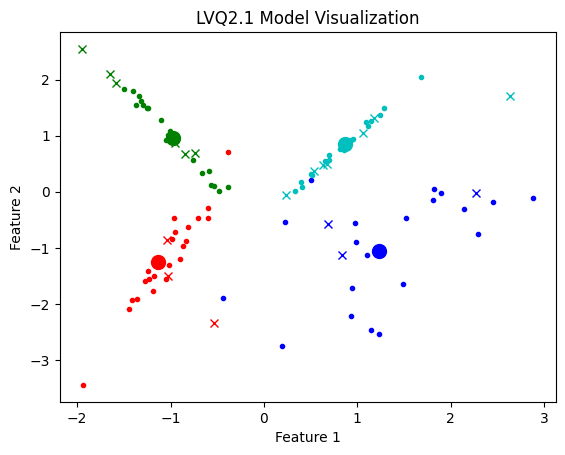

In [11]:
# Training menggunakan LVQ2.1 dengan parameter
model = lvq21_fit(X_train, y_train, lrate=0.5, b=0.8, max_epoch=100, epsilon=0.3)

# Testing model
output = lvq_predict(X_test, model)

# Menghitung akurasi
accuracy = calc_accuracy(y_test, output)

# Visualisasi
colors = 'rgbcmyk'
print('Accuracy:', accuracy)

# Plot data training
for x, label in zip(X_train, y_train):
    plt.plot(x[0], x[1], colors[label] + '.')

# Plot prototipe (model center)
for center, label in zip(model[0], model[1]):
    plt.plot(center[0], center[1], colors[label] + 'o', markersize=10)

# Plot data testing
for x, label in zip(X_test, output):
    plt.plot(x[0], x[1], colors[label] + 'x')

plt.title('LVQ2.1 Model Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Analisis

Jelaskan hasil yang anda dapatkan!

### Analisis Hasil

Dari tiga percobaan menggunakan model LVQ, LVQ2, dan LVQ2.1, berikut adalah analisis terhadap hasil yang diperoleh:

#### 1. **LVQ (Learning Vector Quantization)**:
   - **Akurasi**: 0.8 (80%)
   - **Analisis**:
     - Model LVQ mencapai akurasi yang cukup baik, yaitu 80%, yang menunjukkan bahwa model ini dapat memetakan pola dalam data dengan cukup akurat. LVQ mengupdate bobot centroids berdasarkan data yang paling dekat dengan centroid yang ada, namun tidak terlalu memperhatikan interaksi antar centroids.
     - Dalam visualisasi, terlihat bahwa data pelatihan dan pengujian cukup terpisah dengan jelas berdasarkan kategori, yang mencerminkan pemisahan yang efektif oleh model LVQ.

#### 2. **LVQ2 (LVQ dengan Pembaruan Dua Centroid Terdekat)**:
   - **Akurasi**: 0.65 (65%)
   - **Analisis**:
     - Model LVQ2 menunjukkan penurunan akurasi dibandingkan dengan LVQ, dengan nilai akurasi 65%. Ini menunjukkan bahwa meskipun LVQ2 melibatkan pembaruan dua centroid terdekat, model ini tidak selalu berhasil meningkatkan performa pada dataset ini.
     - LVQ2 memperbarui dua centroid terdekat berdasarkan rasio jarak antar centroid, yang memungkinkan model ini menangani lebih banyak kasus. Namun, dalam kasus ini, akurasi yang lebih rendah dapat disebabkan oleh sensitivitas model terhadap epsilon dan parameter lainnya, yang tidak sepenuhnya dioptimalkan.
     - Visualisasi menunjukkan adanya tumpang tindih antara data pelatihan dan pengujian, terutama pada beberapa kelas, yang bisa menjadi indikasi bahwa model kesulitan membedakan beberapa kelas.

#### 3. **LVQ2.1 (LVQ dengan Pembaruan Dua Centroid Terdekat dan Pengaruh Epsilon)**:
   - **Akurasi**: 0.85 (85%)
   - **Analisis**:
     - Model LVQ2.1 memberikan hasil terbaik dengan akurasi 85%. Dengan memperkenalkan epsilon untuk membandingkan rasio jarak terdekat dan kedua terdekat, LVQ2.1 bisa lebih fleksibel dalam menangani data, meningkatkan kemampuan model untuk memisahkan kelas dengan lebih baik.
     - Akurasi yang lebih tinggi menunjukkan bahwa model ini lebih stabil dan lebih cermat dalam memetakan data ke centroid yang sesuai. Pembaruan bobot yang lebih fleksibel dan adaptif meningkatkan performa model.
     - Visualisasi menunjukkan bahwa model ini dapat memisahkan data dengan lebih jelas, dengan centroid lebih terfokus pada masing-masing kelas, yang mengindikasikan bahwa LVQ2.1 dapat menangani kompleksitas data dengan lebih baik.

### Kesimpulan:
- **LVQ** cenderung lebih sederhana dan efektif dalam beberapa kasus dengan akurasi 80%, tetapi kurang fleksibel untuk menangani variasi data yang lebih kompleks.
- **LVQ2** mencoba memperbaiki dengan memanfaatkan dua centroid terdekat, namun akurasi 65% menunjukkan bahwa model ini mungkin terlalu sensitif terhadap parameter epsilon atau tidak optimal dalam menangani dataset ini.
- **LVQ2.1** memberikan performa terbaik (85%), berkat pembaruan bobot yang lebih adaptif dan pengaruh epsilon dalam memperbaiki pemisahan antar kelas.

Secara keseluruhan, LVQ2.1 lebih unggul dalam menangani dataset ini, memberikan hasil yang lebih stabil dan akurat dibandingkan dengan LVQ dan LVQ2.